In [10]:
import sklearn

import shap
shap.initjs()

In [11]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [12]:
# df.info()

In [13]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
# shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)
# shap.force_plot(explainer.expected_value, shap_values_single, X_display.iloc[5,:])

shap_values_norm = explainer(X.iloc[0,:])
shap.summary_plot(shap_values_norm, X_valid.iloc[0:1000,:])

AttributeError: 'Kernel' object has no attribute 'feature_names'

In [9]:
explainer = shap.Explainer(f, med)
# shap_values = explainer(X_valid.iloc[0:1000,:])

NameError: name 'e' is not defined

In [12]:
ex = shap.KernelExplainer(knn.predict, X_train)
# shap_values = ex.shap_values(df)
# shap.summary_plot(shap_values, df, show=False, sort=False)

Using 26048 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = ex.shap_values(X_train)

  0%|          | 0/26048 [00:00<?, ?it/s]

In [230]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

c:\users\gvarv\anaconda3\envs\vr1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

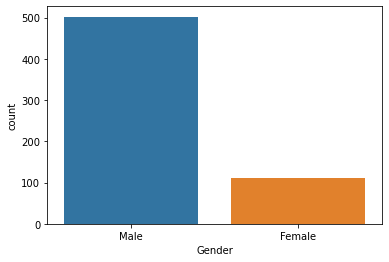

In [231]:
#EXPLANATORY DATA ANALYSIS
sns.countplot(df['Gender'])

c:\users\gvarv\anaconda3\envs\vr1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Married', ylabel='count'>

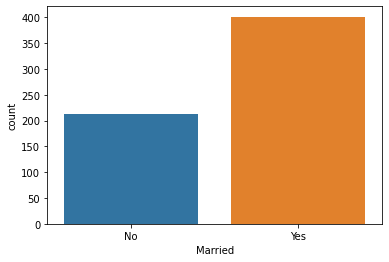

In [232]:
sns.countplot(df['Married'])

c:\users\gvarv\anaconda3\envs\vr1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Dependents', ylabel='count'>

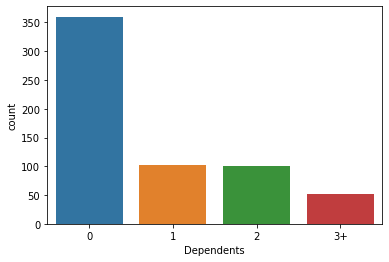

In [233]:
sns.countplot(df['Dependents'])

c:\users\gvarv\anaconda3\envs\vr1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Education', ylabel='count'>

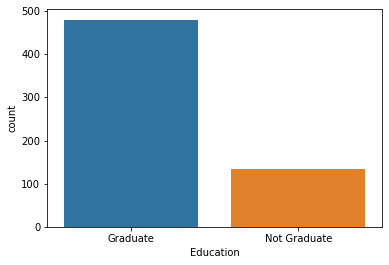

In [234]:
sns.countplot(df['Education'])

c:\users\gvarv\anaconda3\envs\vr1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

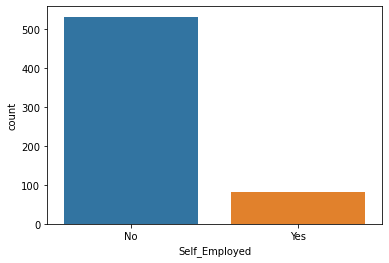

In [235]:
sns.countplot(df['Self_Employed'])

c:\users\gvarv\anaconda3\envs\vr1\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Property_Area', ylabel='count'>

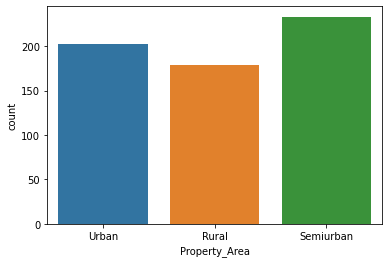

In [236]:
sns.countplot(df['Property_Area'])

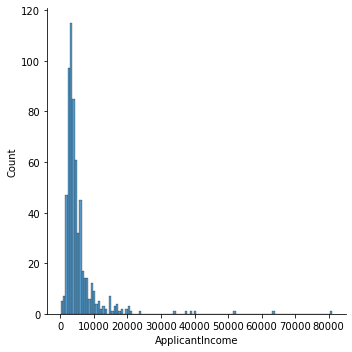

In [237]:
#twra tha kanoyme gia ta numerical Attributes
sns.displot(df['ApplicantIncome'])
#parathroyme oti einai polu monomeriasmeno opote tha xreiastei Normalazation
#opote tha kanoyme log transformation sto attribute


In [238]:
df['ApplicantIncome']=np.log(df['ApplicantIncome']) 
#tha mporoysame na kanoyme kai min Max


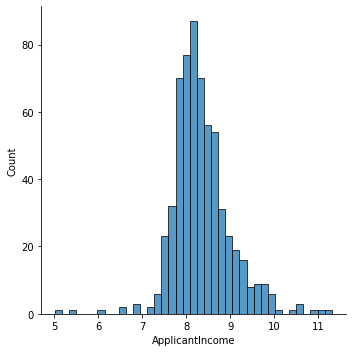

In [239]:
sns.displot(df['ApplicantIncome'])


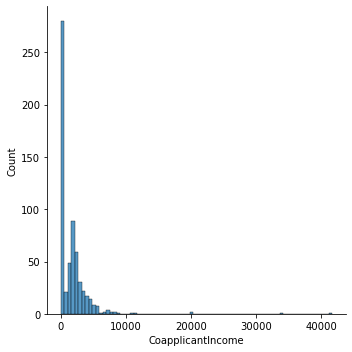

In [240]:
sns.displot(df['CoapplicantIncome'])

In [241]:
df['CoapplicantIncome']=np.log(1+df['CoapplicantIncome']) 

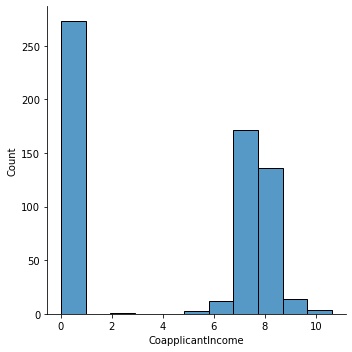

In [242]:
sns.displot(df['CoapplicantIncome'])

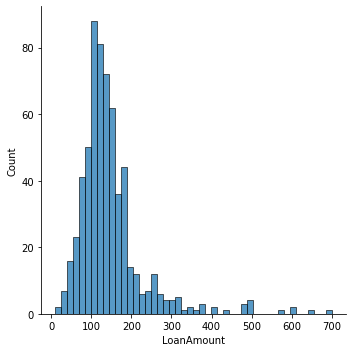

In [243]:
sns.displot(df['LoanAmount'])

In [244]:
df['LoanAmount']=np.log(df['LoanAmount']) 

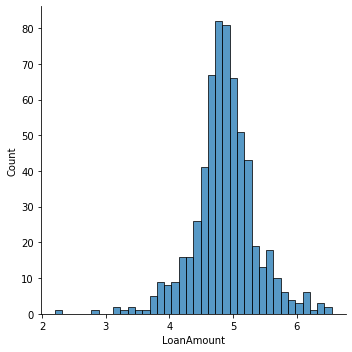

In [245]:
sns.displot(df['LoanAmount'])

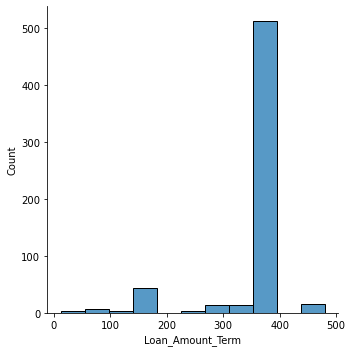

In [246]:
sns.displot(df['Loan_Amount_Term'])

In [247]:
df['Loan_Amount_Term']=np.log(df['Loan_Amount_Term']) 

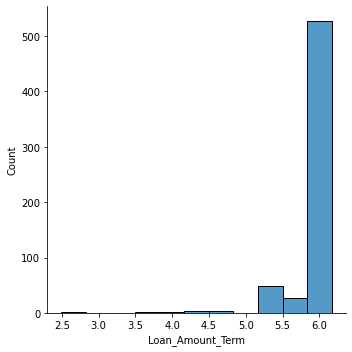

In [248]:
sns.displot(df['Loan_Amount_Term'])

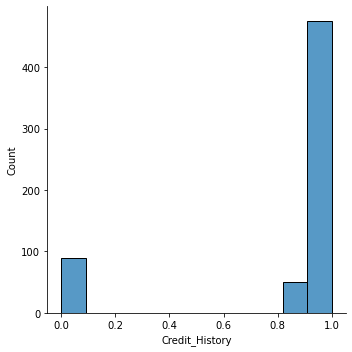

In [249]:
sns.displot(df['Credit_History'])
#edw den tha kanoyme Normalazation giati hdh eimaste anamesa apo 0 kai 1

In [250]:
#LABEL ENCODING
#to married xtypaei error sto label encoding(einai etoimo twra, den eixa kalypsei tis mhdenikes times)
# from sklearn.preprocessing import LabelEncoder
# cols=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
# le= LabelEncoder()
# for col in cols:
#     df[col] = le.fit_transform(df[col])

In [251]:
le = LabelEncoder()



In [252]:
df['Gender']= le.fit_transform(df['Gender'])
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,8.674026,0.000000,4.986426,5.886104,1.000000,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,8.430109,7.319202,4.852030,5.886104,1.000000,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,8.006368,0.000000,4.189655,5.886104,1.000000,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,7.856707,7.765993,4.787492,5.886104,1.000000,Urban,Y
4,LP001008,1,No,0,Graduate,No,8.699515,0.000000,4.948760,5.886104,1.000000,Urban,Y
5,LP001011,1,Yes,2,Graduate,Yes,8.597297,8.342125,5.587249,5.886104,1.000000,Urban,Y
6,LP001013,1,Yes,0,Not Graduate,No,7.754910,7.324490,4.553877,5.886104,1.000000,Urban,Y
7,LP001014,1,Yes,3+,Graduate,No,8.018296,7.826044,5.062595,5.886104,0.000000,Semiurban,N
8,LP001018,1,Yes,2,Graduate,No,8.295549,7.331060,5.123964,5.886104,1.000000,Urban,Y
9,LP001020,1,Yes,1,Graduate,No,9.460398,9.302828,5.855072,5.886104,1.000000,Semiurban,N


In [253]:
df['Education']= le.fit_transform(df['Education'])
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,0,No,8.674026,0.000000,4.986426,5.886104,1.000000,Urban,Y
1,LP001003,1,Yes,1,0,No,8.430109,7.319202,4.852030,5.886104,1.000000,Rural,N
2,LP001005,1,Yes,0,0,Yes,8.006368,0.000000,4.189655,5.886104,1.000000,Urban,Y
3,LP001006,1,Yes,0,1,No,7.856707,7.765993,4.787492,5.886104,1.000000,Urban,Y
4,LP001008,1,No,0,0,No,8.699515,0.000000,4.948760,5.886104,1.000000,Urban,Y
5,LP001011,1,Yes,2,0,Yes,8.597297,8.342125,5.587249,5.886104,1.000000,Urban,Y
6,LP001013,1,Yes,0,1,No,7.754910,7.324490,4.553877,5.886104,1.000000,Urban,Y
7,LP001014,1,Yes,3+,0,No,8.018296,7.826044,5.062595,5.886104,0.000000,Semiurban,N
8,LP001018,1,Yes,2,0,No,8.295549,7.331060,5.123964,5.886104,1.000000,Urban,Y
9,LP001020,1,Yes,1,0,No,9.460398,9.302828,5.855072,5.886104,1.000000,Semiurban,N


In [254]:
df['Self_Employed']= le.fit_transform(df['Self_Employed'])
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,Urban,Y
1,LP001003,1,Yes,1,0,0,8.430109,7.319202,4.852030,5.886104,1.000000,Rural,N
2,LP001005,1,Yes,0,0,1,8.006368,0.000000,4.189655,5.886104,1.000000,Urban,Y
3,LP001006,1,Yes,0,1,0,7.856707,7.765993,4.787492,5.886104,1.000000,Urban,Y
4,LP001008,1,No,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,Urban,Y
5,LP001011,1,Yes,2,0,1,8.597297,8.342125,5.587249,5.886104,1.000000,Urban,Y
6,LP001013,1,Yes,0,1,0,7.754910,7.324490,4.553877,5.886104,1.000000,Urban,Y
7,LP001014,1,Yes,3+,0,0,8.018296,7.826044,5.062595,5.886104,0.000000,Semiurban,N
8,LP001018,1,Yes,2,0,0,8.295549,7.331060,5.123964,5.886104,1.000000,Urban,Y
9,LP001020,1,Yes,1,0,0,9.460398,9.302828,5.855072,5.886104,1.000000,Semiurban,N


In [255]:
df['Property_Area']= le.fit_transform(df['Property_Area'])
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,2,Y
1,LP001003,1,Yes,1,0,0,8.430109,7.319202,4.852030,5.886104,1.000000,0,N
2,LP001005,1,Yes,0,0,1,8.006368,0.000000,4.189655,5.886104,1.000000,2,Y
3,LP001006,1,Yes,0,1,0,7.856707,7.765993,4.787492,5.886104,1.000000,2,Y
4,LP001008,1,No,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,2,Y
5,LP001011,1,Yes,2,0,1,8.597297,8.342125,5.587249,5.886104,1.000000,2,Y
6,LP001013,1,Yes,0,1,0,7.754910,7.324490,4.553877,5.886104,1.000000,2,Y
7,LP001014,1,Yes,3+,0,0,8.018296,7.826044,5.062595,5.886104,0.000000,1,N
8,LP001018,1,Yes,2,0,0,8.295549,7.331060,5.123964,5.886104,1.000000,2,Y
9,LP001020,1,Yes,1,0,0,9.460398,9.302828,5.855072,5.886104,1.000000,1,N


In [256]:
df['Loan_Status']= le.fit_transform(df['Loan_Status'])
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,2,1
1,LP001003,1,Yes,1,0,0,8.430109,7.319202,4.852030,5.886104,1.000000,0,0
2,LP001005,1,Yes,0,0,1,8.006368,0.000000,4.189655,5.886104,1.000000,2,1
3,LP001006,1,Yes,0,1,0,7.856707,7.765993,4.787492,5.886104,1.000000,2,1
4,LP001008,1,No,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,2,1
5,LP001011,1,Yes,2,0,1,8.597297,8.342125,5.587249,5.886104,1.000000,2,1
6,LP001013,1,Yes,0,1,0,7.754910,7.324490,4.553877,5.886104,1.000000,2,1
7,LP001014,1,Yes,3+,0,0,8.018296,7.826044,5.062595,5.886104,0.000000,1,0
8,LP001018,1,Yes,2,0,0,8.295549,7.331060,5.123964,5.886104,1.000000,2,1
9,LP001020,1,Yes,1,0,0,9.460398,9.302828,5.855072,5.886104,1.000000,1,0


In [257]:
df['Married']= le.fit_transform(df['Married'])
df.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,2,1
1,LP001003,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,1.000000,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.000000,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,1.000000,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,2,1
5,LP001011,1,1,2,0,1,8.597297,8.342125,5.587249,5.886104,1.000000,2,1
6,LP001013,1,1,0,1,0,7.754910,7.324490,4.553877,5.886104,1.000000,2,1
7,LP001014,1,1,3+,0,0,8.018296,7.826044,5.062595,5.886104,0.000000,1,0
8,LP001018,1,1,2,0,0,8.295549,7.331060,5.123964,5.886104,1.000000,2,1
9,LP001020,1,1,1,0,0,9.460398,9.302828,5.855072,5.886104,1.000000,1,0


In [260]:
df['Dependents']= le.fit_transform(df['Dependents'])
df.head(30)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,2,1
1,LP001003,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,1.000000,0,0
2,LP001005,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.000000,2,1
3,LP001006,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,1.000000,2,1
4,LP001008,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,2,1
5,LP001011,1,1,2,0,1,8.597297,8.342125,5.587249,5.886104,1.000000,2,1
6,LP001013,1,1,0,1,0,7.754910,7.324490,4.553877,5.886104,1.000000,2,1
7,LP001014,1,1,3,0,0,8.018296,7.826044,5.062595,5.886104,0.000000,1,0
8,LP001018,1,1,2,0,0,8.295549,7.331060,5.123964,5.886104,1.000000,2,1
9,LP001020,1,1,1,0,0,9.460398,9.302828,5.855072,5.886104,1.000000,1,0


In [269]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [272]:
df = df.drop(columns=['Loan_ID'])


KeyError: "['Loan_ID'] not found in axis"

In [273]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,4.986426,5.886104,1.0,2,1
1,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,1.0,0,0
2,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.0,2,1
3,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,1.0,2,1
4,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.0,2,1


In [274]:


X = df.drop(columns=['Loan_Status'], axis=1)


Y = df['Loan_Status']


In [275]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [281]:
#MODEL TRAINING
from sklearn.model_selection import cross_val_score
def classify(model, x ,y):
    model.fit(x_train, y_train)
    print ('Accuracy is', model.score(x_test, y_test)*100)
     #cross validation 
    score = cross_val_score(model, x, y, cv=5)
    print("Cross Validation is," ,np.mean(score)*100) # epeidh tha exoume 
    #5 score , kanoyme ena mean aytwn twn score

In [282]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, Y)

Accuracy is 78.86178861788618
Cross Validation is, 80.78368652538984


In [283]:
df.head(85)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,8.674026,0.000000,4.986426,5.886104,1.000000,2,1
1,1,1,1,0,0,8.430109,7.319202,4.852030,5.886104,1.000000,0,0
2,1,1,0,0,1,8.006368,0.000000,4.189655,5.886104,1.000000,2,1
3,1,1,0,1,0,7.856707,7.765993,4.787492,5.886104,1.000000,2,1
4,1,0,0,0,0,8.699515,0.000000,4.948760,5.886104,1.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,0,0,0,0,8.254789,0.000000,4.709530,5.886104,1.000000,1,1
81,1,1,1,0,1,7.781139,0.000000,4.986426,5.886104,1.000000,1,1
82,0,1,2,0,0,7.228388,7.540090,5.117994,5.886104,1.000000,2,0
83,1,1,0,0,0,8.699515,7.719130,5.579730,5.886104,0.842199,1,0


In [284]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
classify (model, X, Y)

Accuracy is 71.54471544715447
Cross Validation is, 71.17686258829802


In [285]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model=RandomForestClassifier()
classify (model, X, Y)

Accuracy is 75.60975609756098
Cross Validation is, 79.3202718912435


In [286]:
model=ExtraTreesClassifier()
classify (model, X, Y)

Accuracy is 77.23577235772358
Cross Validation is, 76.87591630014661


In [287]:
### HYPERPARAMETER TUNING FOR RANDOM FOREST CLASSIFIER
model=RandomForestClassifier(n_estimators=25, max_depth=7, max_features=1)
classify (model, X, Y)

Accuracy is 73.98373983739837
Cross Validation is, 79.80274556843929


In [288]:
## CONFUSION MATRIX
model=RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [289]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm= confusion_matrix(y_test, y_pred)

<AxesSubplot:>

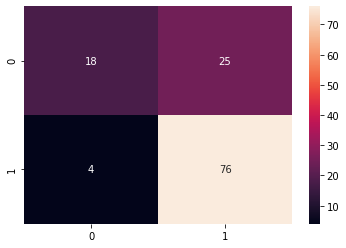

In [290]:
sns.heatmap(cm,annot=True)

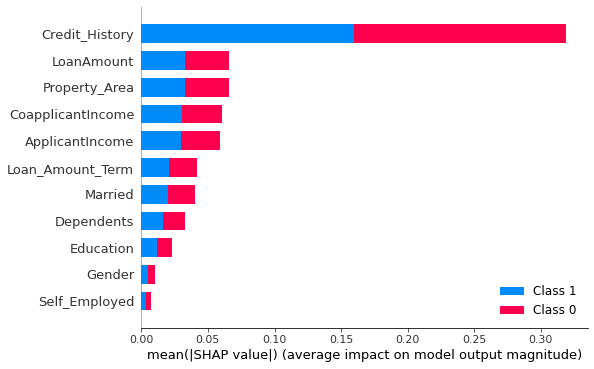

In [293]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

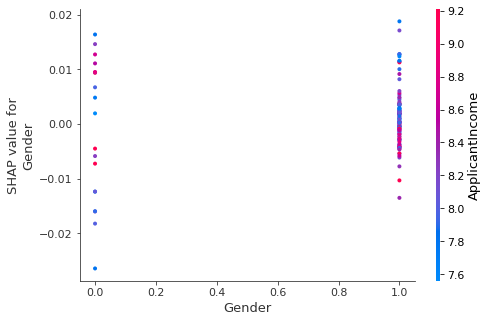

In [299]:
shap.dependence_plot("Gender", shap_values[0], x_test)

In [303]:
explainer = shap.KernelExplainer(model.predict_proba, x_test)
shap_values = explainer.shap_values(x_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], x_test)

Using 123 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/123 [00:00<?, ?it/s]